# `simpl_eeg` package
<br>

## Introduction

Electroencephalograms (EEG) is an electrophysiological measurement method used to examine the electrical activity of the brain and represent it as location-based channels of waves and frequencies. EEG benefits from being inexpensive and unobtrusive, leading to its widespread use in diagnosing brain disorders such as epilepsy and brain damage from head injuries. EEG data is recorded with high dimensionality, so the use of visualizations and metrics is essential for the data to be easily interpreted by humans. Currently, the options for visualizing EEG data require the use of complicated packages or software and the functionally is often limited.

`simpl_eeg` package is developed by students from the Master of Data Science program of University of British Columbia to provide the ability to conveniently produce advanced visualizations and metrics for specified time ranges of EEG data.
<br>

## Instructions

### Installation

Run the following commands in your terminal to clone the repository and install the package:

```bash
git clone https://github.com/UBC-MDS/simpl_eeg_capstone.git
cd simpl_eeg_capstone
pip install -e .
```
<br>

### Import

There are six modules in this package. Each of them contains functions for different visualizations. The `eeg_objects` module contains functions to convert the raw data into epoched data with specified time ranges.

In [1]:
from simpl_eeg import raw_voltage, eeg_objects, connectivity, topomap_2d, topomap_3d_brain, topomap_3d_head

**Please include the line below in your IDE so that the changes would automatically reflect when you make a change to the python scripts.**

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

<br>

### Define parameters

There are some common parameters for all functions in this package, it would be more convenient to define all parameters before going into each functions.

In [ ]:
# change None to values of interest

# experiment = None 
# nth_epoch = None
# color_min = None
# color_max = None
# colormap = None

In [4]:
nth_epoch = 0
experiment = "927"

<br>

### Create epoched data

In [5]:
raw = eeg_objects.Epochs(experiment)

Reading C:\Users\Yiki\Documents\UBC\MDS\Homework\capstone\simpl_eeg_capstone\notebook\data\927\fixica.fdt


c:\users\yiki\documents\ubc\mds\homework\capstone\simpl_eeg_capstone\simpl_eeg\eeg_objects.py:22: RuntimeWarning: Data file name in EEG.data (927 fix ica correct.fdt) is incorrect, the file name must have changed on disk, using the correct file name (fixica.fdt).
  self.raw = mne.io.read_raw_eeglab("data/"+experiment+"/fixica.set")


Not setting metadata
Not setting metadata
33 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 33 events and 4097 original time points ...
0 bad epochs dropped


In [6]:
epoch = raw.get_nth_epoch(nth_epoch)

<br>

### Create the raw voltage plot

#### To generate the plot

In [ ]:
voltage_plot = raw_voltage.plot_voltage(epoch)
voltage_plot;

#### To save the plot

In [ ]:
# You could change the plot to different formats by changing the format argument in the function. 
# It supports 'png', 'pdf', 'svg'.

voltage_plot.savefig("voltage_plot.svg", format= 'svg')

<br>

### Create the connectivity plot

#### To generate the plot

c:\users\yiki\documents\ubc\mds\homework\capstone\simpl_eeg_capstone\simpl_eeg\connectivity.py:112: RuntimeWarning: divide by zero encountered in double_scalars
  linewidth=0.2/(1-correlation),


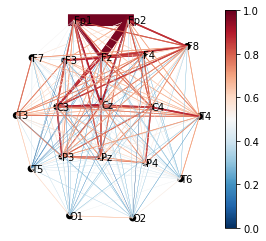

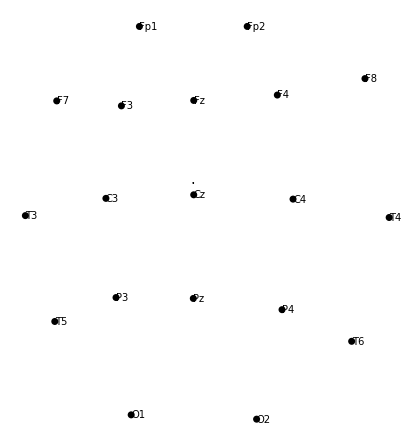

In [15]:
import matplotlib.pyplot as plt
fig=plt.figure()
# sensor_locations = ;
locations = epoch.plot_sensors(show_names=True, show=False, verbose=False).findobj(
        match=lambda x: type(x) == plt.Text and x.get_text() != ""
    )
conn_plot = connectivity.plot_connectivity(epoch, fig, locations=locations, calc_type="correlation")

ValueError: 'RdBlu_r' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

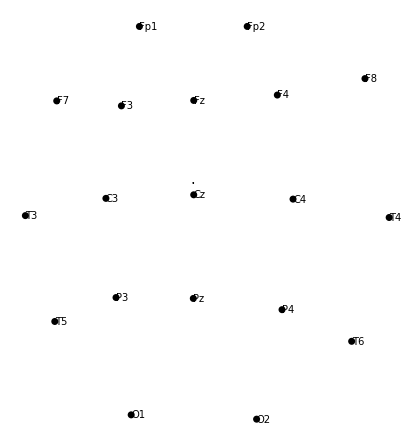

<Figure size 432x288 with 0 Axes>

In [8]:
conn_plot = connectivity.animate_connectivity(epoch, calc_type="correlation")

<br>

### Create the topographic map in 3D head shape

#### To generate the plot

In [ ]:
timestamp = -300 # you can change the value to the time stamp of your interest
topo_3d_static = topomap_3d_head.topo_3d_map(epoch, timestamp)

In [ ]:
topo_3d_static.show()

#### To generate the animnation

In [ ]:
topo_3d = topomap_3d_head.animate_3d_head(epoch)

In [ ]:
topo_3d.show()

#### To save the animnation

##### To save the static plot

In [ ]:
topo_3d_static.write_image("topo_3d_static.svg", engine="kaleido") 

In [ ]:
topo_3d_static.write_image("topo_3d_static.png") # no need to specify engine if not saved as svg file

##### To save the animnation as html

In [ ]:
topo_3d.write_html("topo_3d.html")

##### To save the animation as gif file

You would need specify the starting timestamp, ending timestamp and the duration between frames

In [ ]:
topomap_3d_head.save_gif(epoch, starting=-300, ending=-290, gifname="example", duration=100)

##### To save the animation as mp4 file

You would need to save it as gif file first and then convert it into mp4 file.

In [ ]:
import moviepy.editor as mp

clip = mp.VideoFileClip("example.gif")
clip.write_videofile("example.mp4")